In [1]:
#Importing
import pandas as pd
import numpy as np
import math
from Potato import plotparams
import matplotlib.pyplot as plt

In [2]:
#This is to read my csv files
Gaia0 = pd.read_csv('Index0_GaiaX')
Gaia1 = pd.read_csv('Index1_GaiaX')
Dipper = pd.read_csv('DippersXGaia.csv')

#Extinciton files
Ext13_13_5 = pd.read_csv('index_13_13.5_subset.csv')
Ext13_5_14 = pd.read_csv('index_13.5_14_subset.csv')
ExtDip = pd.read_csv('DippersXGaia_extinctions.csv')

/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/3156881622.py:2: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia0 = pd.read_csv('Index0_GaiaX')
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/3156881622.py:3: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia1 = pd.read_csv('Index1_GaiaX')


In [3]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [4]:
#Removing bad (negative) parallaxes
good_plx0 = Gaia0.loc[Gaia0['plx'] > 0].reset_index(drop=True)

good_plx1 = Gaia1.loc[Gaia1['plx'] > 0].reset_index(drop=True)

good_plxD = Dipper.loc[Dipper['Plx'] > 0].reset_index(drop=True)

In [5]:
#Checking the errors
good_plx0['plx_e_plx'] = good_plx0['plx'] / good_plx0['e_Plx']
gplx0 = good_plx0[good_plx0['plx_e_plx'] > 10].reset_index(drop=True)

good_plx1['plx_e_plx'] = good_plx1['plx'] / good_plx1['e_Plx']
gplx1 = good_plx1[good_plx1['plx_e_plx'] > 10].reset_index(drop=True)

good_plxD['plx_e_plx'] = good_plxD['Plx'] / good_plxD['e_Plx']
gplxD = good_plxD

In [6]:
#Finding the corresponding Extinction
Ext13ID0 = gplx0['asas_sn_id']
Ext13_0 = pd.DataFrame()
for i in Ext13ID0:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_0 = pd.concat([Ext13_0,row]).reset_index(drop=True)

Ext14ID0 = gplx0['asas_sn_id']
Ext14_0 = pd.DataFrame()
for i in Ext14ID0:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_0 = pd.concat([Ext14_0,row]).reset_index(drop=True)

Ext0 = pd.concat([Ext13_0,Ext14_0])


Ext13ID1 = gplx1['asas_sn_id']
Ext13_1 = pd.DataFrame()
for i in Ext13ID1:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_1 = pd.concat([Ext13_1,row]).reset_index(drop=True)

Ext14ID1 = gplx1['asas_sn_id']
Ext14_1 = pd.DataFrame()
for i in Ext14ID1:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_1 = pd.concat([Ext14_1,row]).reset_index(drop=True)

Ext1 = pd.concat([Ext13_1,Ext14_1])

ExtIDDip = gplxD['Asas-sn-id']
ExtDip_D = pd.DataFrame()
for i in ExtIDDip:
    row = ExtDip.loc[ExtDip['asas_sn_id'] == i].reset_index(drop=True)
    ExtDip_D = pd.concat([ExtDip_D,row]).reset_index(drop=True)

In [7]:
#Add the extinction to dataframes
AID130 = Ext0['asas_sn_id']
gp0 = gplx0['asas_sn_id']
df0 = pd.DataFrame()
for i in AID130:
    row = gplx0.loc[gplx0['asas_sn_id'] == i].reset_index(drop=True)
    df0 = pd.concat([df0,row]).reset_index(drop=True)
df0E = df0.merge(Ext0[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


AID131 = Ext1['asas_sn_id']
gp1 = gplx1['asas_sn_id']
df1 = pd.DataFrame()
for i in AID131:
    row = gplx1.loc[gplx1['asas_sn_id'] == i].reset_index(drop=True)
    df1 = pd.concat([df1,row]).reset_index(drop=True)
df1E = df1.merge(Ext1[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


ExtDip_D.rename(columns={'asas_sn_id':'Asas-sn-id'}, inplace=True)
AID13D = ExtDip_D['Asas-sn-id']
gpD = gplxD['Asas-sn-id']
dfD = pd.DataFrame()
for i in AID13D:
    row = gplxD.loc[gplxD['Asas-sn-id'] == i].reset_index(drop=True)
    dfD = pd.concat([dfD,row]).reset_index(drop=True)
dfDE = dfD.merge(ExtDip_D[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','Asas-sn-id']], on='Asas-sn-id',how='left')

In [8]:
#Dividing the known into their catagories
dfDE = dfDE.loc[dfDE['Asas-sn-id'] != 85900493523].reset_index(drop=True)
dfDE = dfDE.loc[dfDE['Asas-sn-id'] != 300648066206].reset_index(drop=True)
dfDE = dfDE.loc[dfDE['Asas-sn-id'] != 523986878999].reset_index(drop=True)

A24fa = dfDE.loc[dfDE['Known'] == 2].reset_index(drop=True)

Binary = dfDE.loc[dfDE['Binary'] == 1].reset_index(drop=True)

Known = dfDE.loc[dfDE['Known'] == 1].reset_index(drop=True)

NewDip1 = dfDE.loc[dfDE['Dipper'] == 1].reset_index(drop=True)
NewDip = NewDip1.loc[NewDip1['Known'] == 0].reset_index(drop=True)

In [9]:
#Distances
dist0 = 1000 / df0E['plx']

dist1 = 1000 / df1E['plx']

dist24fa = 1000 / A24fa['Plx']

distBin = 1000 / Binary['Plx']

distKnown = 1000 / Known['Plx']

distND = 1000 / NewDip['Plx']

In [10]:
#mag = -2.5log10(flux)
mag0 = df0E['Gmag']
Mag0 = []
for i in range(len(mag0)):
    Mag0.append(mag0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_ag'][i])

mag1 = df1E['Gmag']
Mag1 = []
for i in range(len(mag1)):
    Mag1.append(mag1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_ag'][i])

mag24fa = A24fa['Gmag']
Mag24fa = []
for i in range(len(mag24fa)):
    Mag24fa.append(mag24fa[i] + 5 - (5 * math.log10(dist24fa[i])) - A24fa['mwdust_ag'][i])

magBin = Binary['Gmag']
MagBin = []
for i in range(len(magBin)):
    MagBin.append(magBin[i] + 5 - (5 * math.log10(distBin[i])) - Binary['mwdust_ag'][i])

magKnown = Known['Gmag']
MagKnown = []
for i in range(len(magKnown)):
    MagKnown.append(magKnown[i] + 5 - (5 * math.log10(distKnown[i])) - Known['mwdust_ag'][i])

magND = NewDip['Gmag']
MagND = []
for i in range(len(magND)):
    MagND.append(magND[i] + 5 - (5 * math.log10(distND[i])) - NewDip['mwdust_ag'][i])

In [11]:
#Color
bp0 = df0E['BPmag']
rp0 = df0E['RPmag']
BP0 = []
RP0 = []
for i in range(len(bp0)):
    BP0.append(bp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_abp'][i])
for i in range(len(rp0)):
    RP0.append(rp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_arp'][i])
bprp0 = [x - y for x, y in zip(BP0,RP0)]

bp1 = df1E['BPmag']
rp1 = df1E['RPmag']
BP1 = []
RP1 = []
for i in range(len(bp1)):
    BP1.append(bp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_abp'][i])
for i in range(len(rp1)):
    RP1.append(rp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_arp'][i])
bprp1 = [x - y for x, y in zip(BP1,RP1)]

bp24fa = A24fa['BPmag']
rp24fa = A24fa['RPmag']
BP24fa = []
RP24fa = []
for i in range(len(bp24fa)):
    BP24fa.append(bp24fa[i] + 5 - (5 * math.log10(dist24fa[i])) - A24fa['mwdust_abp'][i])
for i in range(len(rp24fa)):
    RP24fa.append(rp24fa[i] + 5 - (5 * math.log10(dist24fa[i])) - A24fa['mwdust_arp'][i])
bprp24fa = [x - y for x, y in zip(BP24fa,RP24fa)]

bpBin = Binary['BPmag']
rpBin = Binary['RPmag']
BPBin = []
RPBin = []
for i in range(len(bpBin)):
    BPBin.append(bpBin[i] + 5 - (5 * math.log10(distBin[i])) - Binary['mwdust_abp'][i])
for i in range(len(rpBin)):
    RPBin.append(rpBin[i] + 5 - (5 * math.log10(distBin[i])) - Binary['mwdust_arp'][i])
bprpBin = [x - y for x, y in zip(BPBin,RPBin)]

bpKnown = Known['BPmag']
rpKnown = Known['RPmag']
BPKnown = []
RPKnown = []
for i in range(len(bpKnown)):
    BPKnown.append(bpKnown[i] + 5 - (5 * math.log10(distKnown[i])) - Known['mwdust_abp'][i])
for i in range(len(rpKnown)):
    RPKnown.append(rpKnown[i] + 5 - (5 * math.log10(distKnown[i])) - Known['mwdust_arp'][i])
bprpKnown = [x - y for x, y in zip(BPKnown,RPKnown)]

bpND = NewDip['BPmag']
rpND = NewDip['RPmag']
BPND = []
RPND = []
for i in range(len(bpND)):
    BPND.append(bpND[i] + 5 - (5 * math.log10(distND[i])) - NewDip['mwdust_abp'][i])
for i in range(len(rpND)):
    RPND.append(rpND[i] + 5 - (5 * math.log10(distND[i])) - NewDip['mwdust_arp'][i])
bprpND = [x - y for x, y in zip(BPND,RPND)]

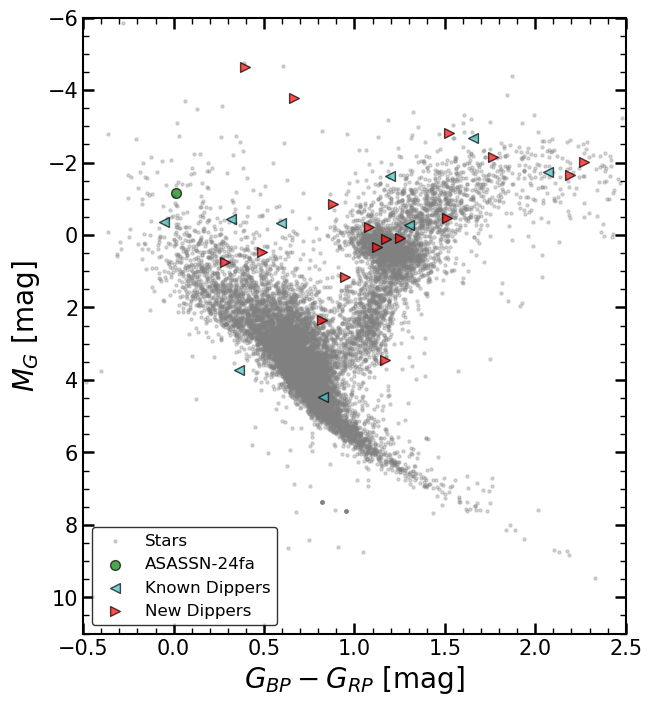

In [12]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')
ax.scatter(bprp24fa, Mag24fa, s=50, color='green', alpha=0.7, label='ASASSN-24fa', edgecolors='black')
#ax.scatter(bprpBin, MagBin, s=50, color='red', marker='s', alpha=0.7, label='Binaries', edgecolors='black')
ax.scatter(bprpKnown, MagKnown, s=50, color=colors[14], marker='<', alpha=0.7, label='Known Dippers', edgecolors='black')
ax.scatter(bprpND, MagND, s=50, color='red', marker='>', alpha=0.7, label='New Dippers', edgecolors='black')
ax.invert_yaxis()
ax.set_xlim(-0.5,2.5)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
ax.legend(fontsize='large',edgecolor='black')

In [13]:
dfDE.head(40)

,Asas-sn-id,ra,dec,Known,Binary,Dipper,Period,DR3Name,RAdeg,DEdeg,...,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist,plx_e_plx,mwdust_av,mwdust_ag,mwdust_abp,mwdust_arp
0,120259184943,320.384047,48.027853,0,0,1,NaN,Gaia DR3 2164763714494843392,320.384047,48.027853,...,48.027852,0.576265,0.523102,-0.2521,0.001124,21.047619,1.535576,1.211570,1.538647,0.904454
1,515396514761,285.818495,-19.960933,0,0,1,NaN,Gaia DR3 4085391549293230208,285.818495,-19.960933,...,-19.960920,0.239715,0.204778,0.2633,0.002640,25.784615,0.563220,0.444381,0.564346,0.331737
2,468196,162.093345,-84.590954,0,1,0,8.4191,Gaia DR3 5190890503216992128,162.093307,-84.590952,...,-84.591013,0.223224,0.247261,0.1181,0.014641,130.569106,0.363140,0.286518,0.363866,0.213890
3,171799777976,0.016507,31.625943,0,1,0,5.7672,Gaia DR3 2873725822770198272,0.016505,31.625940,...,31.626017,0.245023,0.165135,-0.1279,0.010171,139.333333,0.268200,0.211610,0.268736,0.157970
4,292058349903,286.143865,-12.764754,0,1,0,17.2307,Gaia DR3 4197773667887716992,286.143865,-12.764755,...,-12.764745,0.216938,0.192683,0.2933,0.001430,61.015152,1.133586,0.894399,1.135853,0.667682
5,506807056083,121.025534,-23.798825,0,1,0,158.6949,Gaia DR3 5698851784198626304,121.025534,-23.798825,...,-23.798847,0.193991,0.230451,-0.0084,0.002804,18.204969,0.268200,0.211610,0.268736,0.157970
6,541166607713,225.647855,-31.890979,0,1,0,8.1559,Gaia DR3 6205543507190254848,225.647853,-31.890980,...,-31.890952,0.335484,0.284337,-0.1568,0.005751,120.734043,0.361733,0.285407,0.362457,0.213061
7,223339192225,16.440006,-80.057760,0,1,0,8.0693,Gaia DR3 4631683802770934272,16.440011,-80.057760,...,-80.057754,0.216278,0.180944,0.1049,0.003363,33.088235,0.181296,0.143042,0.181658,0.106783
8,498216229432,143.778642,-36.786473,0,1,0,3.5913,Gaia DR3 5436278683672876160,143.778642,-36.786473,...,-36.786486,0.162974,0.216372,0.0591,0.002958,66.008130,0.420968,0.332144,0.421810,0.247950
9,592705576999,160.415993,-58.059161,0,1,0,41.2104,Gaia DR3 5350758669285767808,160.415991,-58.059161,...,-58.059173,0.631927,0.563890,0.0415,0.003648,10.159544,1.417499,1.118407,1.420334,0.834907


In [14]:
print(len(dfDE))
print(len(dfDE["Asas-sn-id"].unique()))

38
38


In [15]:
print(len(MagND)+len(MagKnown)+len(Mag24fa)+len(MagBin))

38


In [16]:
Value = dfDE.loc[dfDE['Asas-sn-id'] == 223339338105]

distval = 1000/Value.Plx

Magval = Value.Gmag + 5 - (5*math.log10(distval)) - Value.mwdust_ag

# val_bprp = Value.BPmag - Value.RPmag

bp_val = Value.BPmag + 5 - (5*math.log10(distval)) - Value.mwdust_abp

rp_val = Value.RPmag + 5 - (5*math.log10(distval)) - Value.mwdust_arp

val_bprp = bp_val - rp_val

print('Gmag:', Value.Gmag)

print('Mag w/ extinction:', Magval)

print('Bp - Rp w/ extinction:', val_bprp)

print('g extinction:', Value.mwdust_ag)

#Mag0.append(mag0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_ag'][i])

Gmag: 23    12.827092
Name: Gmag, dtype: float64
Mag w/ extinction: 23    1.166389
dtype: float64
Bp - Rp w/ extinction: 23    0.945745
dtype: float64
g extinction: 23    0.190449
Name: mwdust_ag, dtype: float64


/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/1575993887.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Magval = Value.Gmag + 5 - (5*math.log10(distval)) - Value.mwdust_ag
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/1575993887.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bp_val = Value.BPmag + 5 - (5*math.log10(distval)) - Value.mwdust_abp
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/1575993887.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rp_val = Value.RPmag + 5 - (5*math.log10(distval)) - Value.mwdust_arp


In [17]:
#print(list(Value.columns))

print('parallax ratio:', Value['plx_e_plx'])
print('mwdust_av:', Value['mwdust_av'])
print('mwdust_ag:', Value['mwdust_ag'])
print('mwdust_abp:', Value.mwdust_abp)
print('mwdust_arp:', Value.mwdust_arp)

parallax ratio: 23    44.964602
Name: plx_e_plx, dtype: float64
mwdust_av: 23    0.24138
Name: mwdust_av, dtype: float64
mwdust_ag: 23    0.24138
Name: mwdust_av, dtype: float64
mwdust_abp: 23    0.241863
Name: mwdust_abp, dtype: float64
mwdust_arp: 23    0.142173
Name: mwdust_arp, dtype: float64


In [18]:
target_data = {
    'RA': 134.56516643356,
    'DEC': -43.16525434891,
    'plx':	0.9613,
    'plx_e': 0.0602,
    'Gmag': 11.764850,
    'Bpmag': 12.186064,
    'Rpmag': 11.159019,
    'Gdust': 2.299445046386098,
    'Bpdust': 2.9202077775397592,
    'Rpdust': 1.7165692424859462}
df_target = pd.DataFrame(data=target_data, index=[0])
df_target.head()

,RA,DEC,plx,plx_e,Gmag,Bpmag,Rpmag,Gdust,Bpdust,Rpdust
0,134.565166,-43.165254,0.9613,0.0602,11.76485,12.186064,11.159019,2.299445,2.920208,1.716569


In [19]:
#mag = -2.5log10(flux)
mag0 = df0E['Gmag']
dist0 = 1000/df0E['plx']
Mag0 = []
for i in range(len(mag0)):
    Mag0.append(mag0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_ag'][i])

mag1 = df1E['Gmag']
dist1 = 1000/df1E['plx']
Mag1 = []
for i in range(len(mag1)):
    Mag1.append(mag1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_ag'][i])

Mag_target = df_target.Gmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Gdust

print(Mag_target)

0   -0.6203
dtype: float64


/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/1072332214.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Mag_target = df_target.Gmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Gdust


In [20]:
#Color
bp0 = df0E['BPmag']
rp0 = df0E['RPmag']
BP0 = []
RP0 = []
for i in range(len(bp0)):
    BP0.append(bp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_abp'][i])
for i in range(len(rp0)):
    RP0.append(rp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_arp'][i])
bprp0 = [x - y for x, y in zip(BP0,RP0)]

bp1 = df1E['BPmag']
rp1 = df1E['RPmag']
BP1 = []
RP1 = []
for i in range(len(bp1)):
    BP1.append(bp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_abp'][i])
for i in range(len(rp1)):
    RP1.append(rp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_arp'][i])
bprp1 = [x - y for x, y in zip(BP1,RP1)]

bp_target = df_target.Bpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Bpdust
rp_target = df_target.Rpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Rpdust
bprp_target = bp_target - rp_target

/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/4110927093.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bp_target = df_target.Bpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Bpdust
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_62120/4110927093.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rp_target = df_target.Rpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Rpdust


In [21]:
bprpKnown.append(bprp_target[0])
MagKnown.append(Mag_target[0])

print(bprp_target)
print(Mag_target)
print(type(MagKnown))
print(type(Mag_target))

0   -0.176594
dtype: float64
0   -0.6203
dtype: float64
<class 'list'>
<class 'pandas.core.series.Series'>


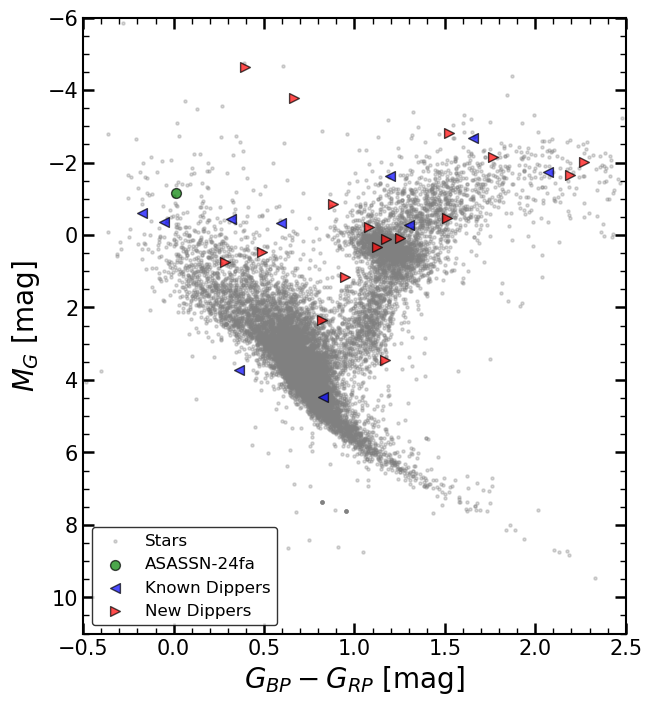

In [22]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')
ax.scatter(bprp24fa, Mag24fa, s=50, color='green', alpha=0.7, label='ASASSN-24fa', edgecolors='black')
ax.scatter(bprpKnown, MagKnown, s=50, color='b', marker='<', alpha=0.7, label='Known Dippers', edgecolors='black')
ax.scatter(bprpND, MagND, s=50, color='red', marker='>', alpha=0.7, label='New Dippers', edgecolors='black')
ax.invert_yaxis()
ax.set_xlim(-0.5,2.5)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
ax.legend(fontsize='large',edgecolor='black')